# Introdução ao TensorFlow

In [1]:
# Biblioteca TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Biblioteca auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [2]:
# Pegar imagens (FASHION_MNIST) de treino e teste 
fashion_mnist = keras.datasets.fashion_mnist

# Imagens e rotulacao (label) das img
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Nomes das classes (rotulos) de cada imagem
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## Pré-processamento

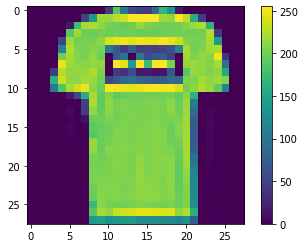

In [12]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
# Dividindo por 255 com o intuito de binarizar a imagem (0 e 1)
train_images = train_images / 255.0
test_images = test_images / 255.0

Após realizar a divisão, perceba que se plotar a mesma imagem acima novamente, a escala (`colorbar()`) vai de 0 a 1 e não de 0 a 255.

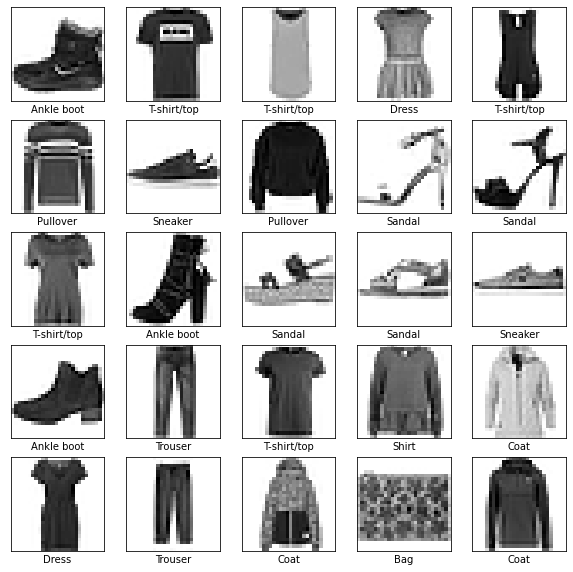

In [16]:
# Plotando as 25 primeiras imagens binarizadas (matplotlib)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) # Binarização
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construindo o modelo

Construir a rede neural requer configurar as camadas do modelo, e depois, compilar o modelo.

#### Montar as camadas 
O principal bloco de construção da rede neural é a camada (layer). As camadas(layers) extraem representações dos dados inseridos na rede.
Com sorte, essas representações são significativas para o problema a mão 


In [36]:
# Três redes neurais para criação do modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

##### Camada Flatten
Transforma o formato da imagem de um array de imagens de duas dimensões (of 28 by 28 pixels) para um array de uma dimensão (de 28 * 28 = 784 pixels). Pense nessa camada como camadas não empilhadas de pixels de uma imagem e os emfilere. Essa camada não tem paramêtros para aprender; ela só reformata os dados.


##### Camadas Dense
A primeira camada Dense tem 128 nós (ou neurônios). A segunda (e última) camada é uma softmax de 10 nós que retorna um array de 10 probabilidades, cuja soma resulta em 1. Cada nó contem um valor que indica a probabilidade de que aquela imagem pertence a uma das 10 classes.

In [37]:
# Ainda é preciso alguns ajustes no modelo treinado, os ajustes são feitos na compilação do modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4804 - accuracy: 0.8313
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4650 - accuracy: 0.8361
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4524 - accuracy: 0.8415
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4425 - accuracy: 0.8449
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4334 - accuracy: 0.8480
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4264 - accuracy: 0.8506
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4196 - accuracy: 0.8521
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4142 - accuracy: 0.8544
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4086 - accuracy: 0.8565
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.404

In [40]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4171 - accuracy: 0.8528

Test accuracy: 0.8528000116348267


In [41]:
predictions = model.predict(test_images)

In [42]:
predictions[0]

array([2.2042572e-07, 4.1064903e-09, 3.5037469e-06, 1.3469055e-06,
       3.8342955e-06, 1.6459799e-01, 2.0631527e-05, 6.0989052e-02,
       2.4061929e-03, 7.7197725e-01], dtype=float32)

In [43]:
np.argmax(predictions[0])

9

In [44]:
test_labels[0]

9

In [45]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

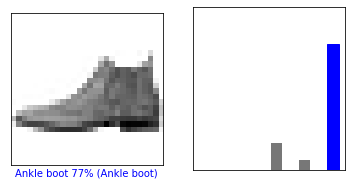

In [46]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

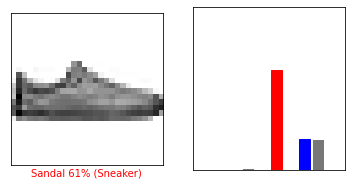

In [47]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

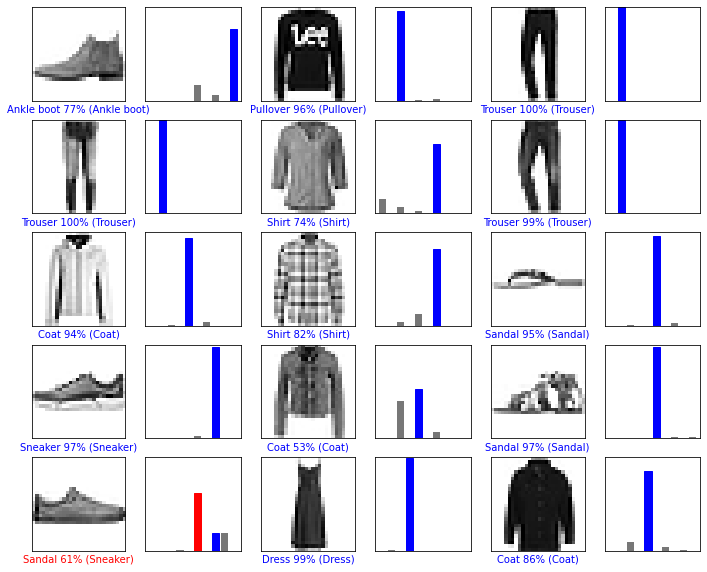

In [48]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [49]:
# Pegue uma imagem do conjunto de dados de teste.
img = test_images[0]
print(img.shape)

(28, 28)


In [50]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [51]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.2042649e-07 4.1064885e-09 3.5037624e-06 1.3469089e-06 3.8342978e-06
  1.6459817e-01 2.0631558e-05 6.0989115e-02 2.4061964e-03 7.7197695e-01]]


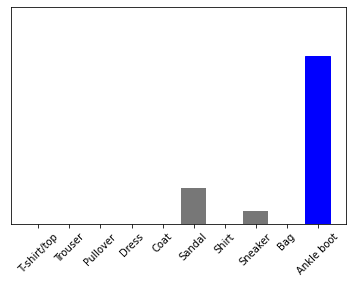

In [52]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [53]:
np.argmax(predictions_single[0])

9